In [1]:
import pandas as pd
import seaborn as sns
import geopandas as gdp
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [4]:
merged_data = pd.read_csv('../data/raw/property_merged.csv')
merged_data = merged_data.drop(columns='Unnamed: 0')



In [39]:
numeric_variables = merged_data[['cost', 'beds', 'station_distance', 'CBD_distance', '2022 pred', 'ERP 2021', 'density 2021 persons/km2', 'scaled_crime_rate']]
numeric_variables = numeric_variables[(np.abs(stats.zscore(numeric_variables['cost'])) < 2.5)]
numeric_variables = numeric_variables[(np.abs(stats.zscore(numeric_variables['station_distance'])) < 2.5)]
numeric_variables = numeric_variables[(np.abs(stats.zscore(numeric_variables['CBD_distance'])) < 2.5)]
numeric_variables = numeric_variables[(np.abs(stats.zscore(numeric_variables['2022 pred'])) < 2.5)]
numeric_variables['CBD_distance'] =np.log(numeric_variables['CBD_distance'])
numeric_variables['station_distance'] =np.log(numeric_variables['station_distance'])

In [40]:
sample =numeric_variables.sample(n=2000, random_state=30034)

In [73]:
sample['POP'] = sample['2022 pred']
sample['ERP'] = sample['ERP 2021']
sample['DENSITY'] = sample['density 2021 persons/km2']

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from statsmodels.formula.api import ols

fit = ols(
    formula='cost ~  beds+  scaled_crime_rate  + station_distance + CBD_distance + POP  + ERP + DENSITY',
    data=sample  
).fit()

In [93]:
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                   cost   R-squared:                       0.176
Model:                            OLS   Adj. R-squared:                  0.173
Method:                 Least Squares   F-statistic:                     60.56
Date:                Mon, 19 Sep 2022   Prob (F-statistic):           4.79e-79
Time:                        01:35:17   Log-Likelihood:                -12919.
No. Observations:                1988   AIC:                         2.585e+04
Df Residuals:                    1980   BIC:                         2.590e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           518.0995     72.83

In [94]:
X_train = sample[['beds']]
Y_train = sample[['cost']]


In [95]:
sample1 = numeric_variables.sample(n=1000, random_state=30034)
X_test = sample1[['beds', 'station_distance', 'CBD_distance', '2022 pred', 'ERP 2021', 'density 2021 persons/km2', 'scaled_crime_rate']]
Y_test = sample1[['cost']]

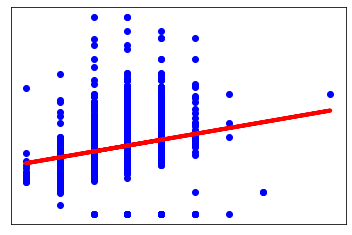

In [97]:
from sklearn import datasets, linear_model

regr = linear_model.LinearRegression()

regr.fit(X_train, Y_train)

plt.scatter(X_train, Y_train,color='blue')

plt.plot(X_train,regr.predict(X_train),color='red',linewidth=4)

plt.xticks(())

plt.yticks(())

plt.show()


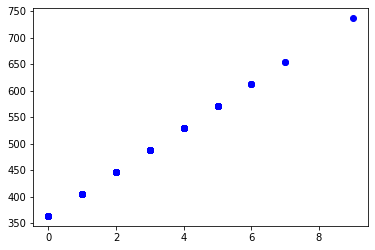

In [98]:
plt.scatter(X_train, regr.predict(X_train),color='blue')